In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
dataset = pd.read_csv('Classified Data.csv')
dataset.drop(columns='Unnamed: 0', inplace=True)



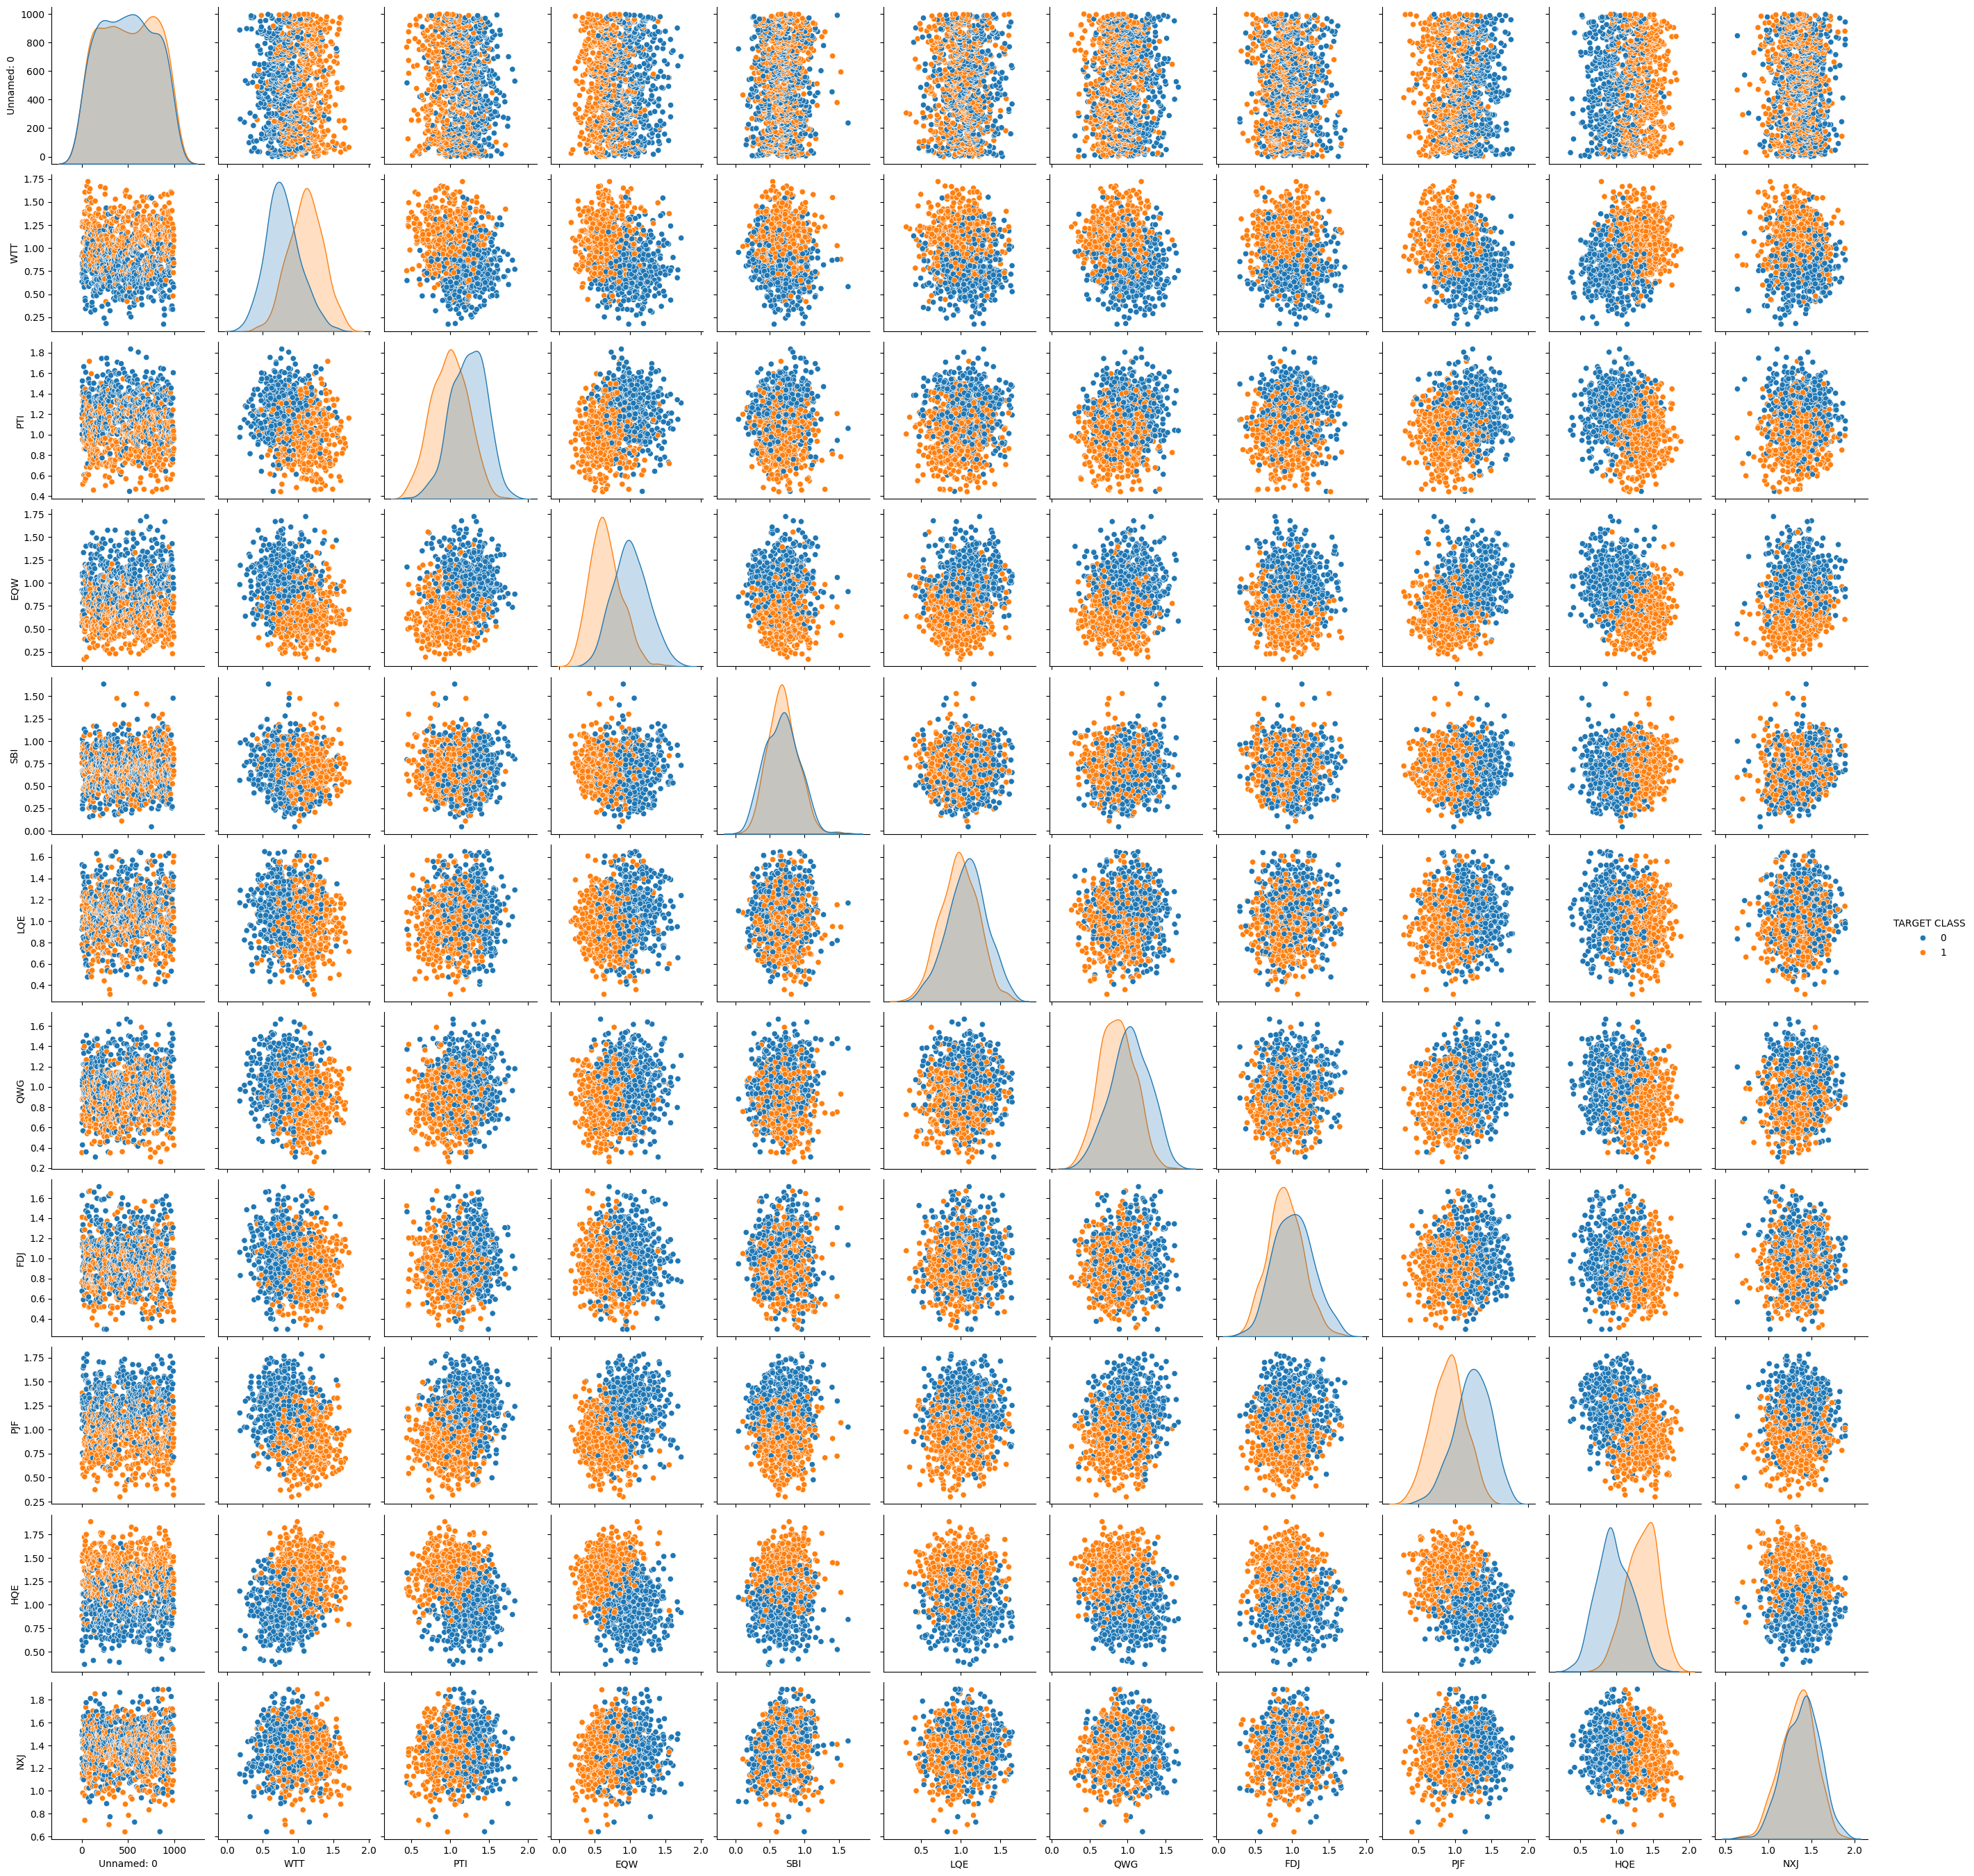

In [3]:
sns.pairplot(dataset,hue='TARGET CLASS')

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
df = dataset.drop(columns='TARGET CLASS')
df

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0             0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1             1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2             2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3             3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4             4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   
..          ...       ...       ...       ...       ...       ...       ...   
995         995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240   
996         996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540   
997         997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738   
998         998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859   
999         999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762   

          FDJ       PJF       HQE       NXJ  
0    0.759697  0.643798  0.879422  1.231409  
1    0.675334  1.013546  0.621552  1.492702  
2    1.626351  1.154483  0.957877  1.285597  
3    1.409708  1.380003  1.522692  1.153093  
4    1.115596  0.646691  1.463812  1.419167  
..        ...       ...       ...       ...  
995  0.746811  0.319752  1.117340  1.348517  
996  1.055928  0.713193  0.958684  1.663489  
997  0.386802  0.389584  0.919191  1.385504  
998  0.855806  1.061338  1.277456  1.188063  
999  0.778234  0.907962  1.257190  1.364837  

[1000 rows x 11 columns]

In [10]:
X_Train, X_Test, Y_Train,Y_Test = train_test_split(df,dataset['TARGET CLASS'],test_size=0.30)

In [11]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_Train,Y_Train)

KNeighborsClassifier()

In [13]:
predicted = knn.predict(X_Test)


In [14]:
#Confusion Matrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_Test,predicted))

[[71 73]
 [78 78]]


In [15]:
print(classification_report(Y_Test,predicted))

              precision    recall  f1-score   support

           0       0.48      0.49      0.48       144
           1       0.52      0.50      0.51       156

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



In [16]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    score = cross_val_score(knn,df,dataset['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

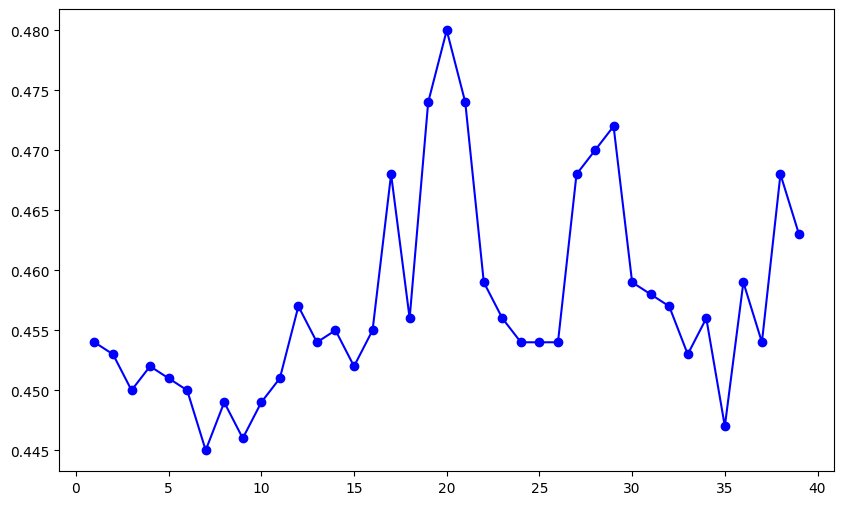

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate, color ='blue', marker = 'o')

In [18]:
from sklearn.model_selection import cross_val_score
error_rate=[]
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_Train,Y_Train)
    predicted_i = knn.predict(X_Test)
    score = cross_val_score(knn,df,dataset['TARGET CLASS'],cv=10)
    error_rate.append(np.mean(predicted_i!=Y_Test))

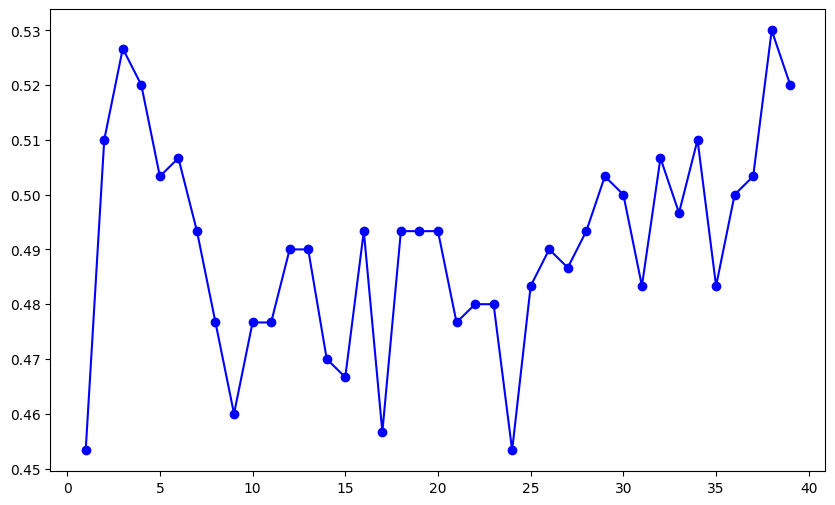

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color ='blue', marker = 'o')

In [23]:
print(dataset.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


In [24]:
## Standardrization because on Raw Data F1 score is too low and performance matrics are not accurate
from sklearn.preprocessing import StandardScaler
## Fir the dataset after drop the column
scaler = StandardScaler()
scaler.fit(dataset.drop('TARGET CLASS', axis=1))
scaledFeature = scaler.transform(dataset.drop('TARGET CLASS', axis=1))

In [25]:
df_fetaure = pd.DataFrame(scaledFeature, columns=dataset.columns[:-1])

In [26]:
df_fetaure.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510

In [29]:
X_Train, X_Test, Y_Train,Y_Test = train_test_split(scaledFeature,dataset['TARGET CLASS'],test_size=0.30)

In [42]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_Train,Y_Train)
predicted = knn.predict(X_Test)
#Confusion Matrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_Test,predicted))
print(classification_report(Y_Test,predicted))

[[145  11]
 [  7 137]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       156
           1       0.93      0.95      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [55]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
max =0
neighborVal=0
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    score = cross_val_score(knn,df_fetaure,dataset['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())
    if score.mean() > max:
        max= score.mean()
        neighborVal = i

print("Neighbor  ", neighborVal, " : accuracy rate ", max)




Neighbor   32  : accuracy rate  0.943


In [54]:
for i, value in enumerate(accuracy_rate):
    print(i+1, "-",value)

1 - 0.9109999999999999
2 - 0.909
3 - 0.9280000000000002
4 - 0.9339999999999999
5 - 0.9289999999999999
6 - 0.929
7 - 0.9310000000000003
8 - 0.9340000000000002
9 - 0.9289999999999999
10 - 0.9350000000000002
11 - 0.9329999999999998
12 - 0.9350000000000002
13 - 0.937
14 - 0.9410000000000001
15 - 0.9390000000000001
16 - 0.9390000000000001
17 - 0.9349999999999999
18 - 0.9360000000000002
19 - 0.9360000000000002
20 - 0.9360000000000002
21 - 0.9339999999999999
22 - 0.9359999999999999
23 - 0.93
24 - 0.933
25 - 0.9349999999999999
26 - 0.937
27 - 0.9380000000000001
28 - 0.938
29 - 0.937
30 - 0.9390000000000001
31 - 0.9360000000000002
32 - 0.943
33 - 0.937
34 - 0.9390000000000001
35 - 0.9390000000000001
36 - 0.9400000000000001
37 - 0.9369999999999999
38 - 0.943
39 - 0.9410000000000001


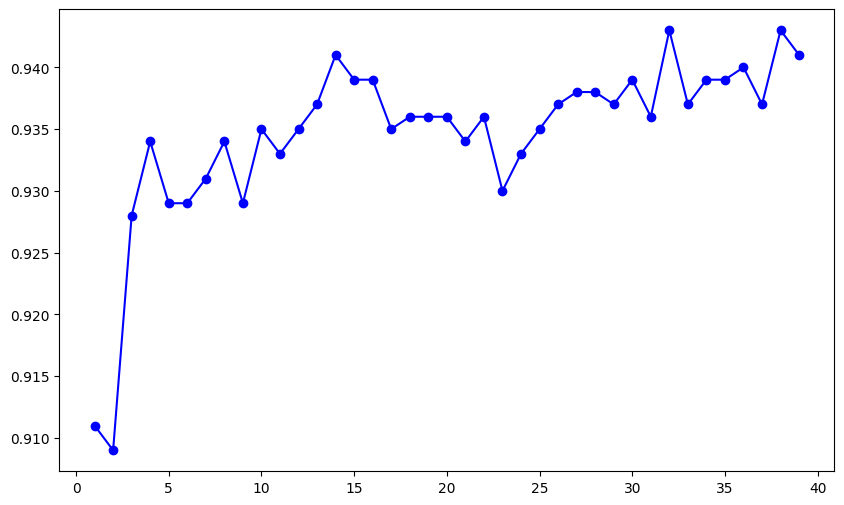

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate, color ='blue', marker = 'o')

In [48]:
error_rate=[]

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_Train,Y_Train)
    score = cross_val_score(knn,df,dataset['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())
error_rate

[0.546,
 0.547,
 0.55,
 0.548,
 0.549,
 0.55,
 0.5549999999999999,
 0.5509999999999999,
 0.554,
 0.5509999999999999,
 0.549,
 0.5429999999999999,
 0.546,
 0.545,
 0.548,
 0.545,
 0.532,
 0.544,
 0.526,
 0.52,
 0.526,
 0.541,
 0.5439999999999999,
 0.546,
 0.546,
 0.546,
 0.532,
 0.53,
 0.528,
 0.541,
 0.542,
 0.5429999999999999,
 0.5469999999999999,
 0.5439999999999999,
 0.553,
 0.541,
 0.546,
 0.532,
 0.537]

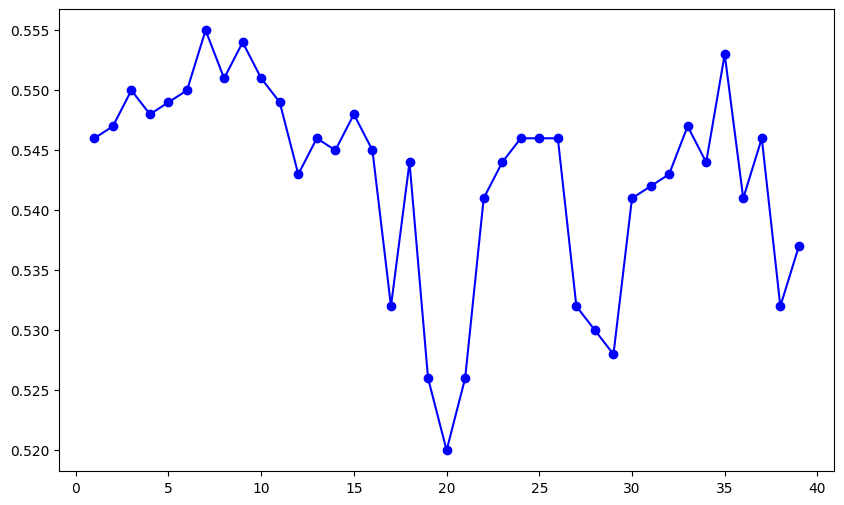

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color ='blue', marker = 'o')

After different Cross validation the maximum accuracy is about 94%